In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

#read the data from one directory up from script location

script_dir = os.path.dirname(os.getcwd())
#go to data directory
data_path = os.path.join(script_dir,  'CurrentPositionMapping', 'data', 'std_all_data.csv')
data = pd.read_csv(data_path)
data = data.dropna()

predictors = data.columns.drop(['TiltCurrent','PanCurrent'])
#Split the data into a training set and a testing set for tilt

x_train, x_test, y_train, y_test = train_test_split(data[predictors], data['TiltCurrent'], test_size=0.2, random_state=42)

In [21]:
x_train 

,UniqueID,TiltPosition,PanPosition,GyroX,GyroY,GyroZ,AccelX,AccelY,AccelZ,tilt_distance,pan_distance
490279,236501,-0.797251,1.067640,-0.009334,-0.027528,-0.022050,0.868231,0.916518,-0.702938,-0.115603,-0.325025
12102,778216,-0.802577,0.395060,-0.021372,-0.035231,-0.020214,0.976531,0.373998,-0.702938,-0.077399,-0.354648
281272,166960,0.695516,1.546509,-0.015353,-0.024447,-0.020214,-0.632492,-1.349301,-0.561834,-0.131976,-0.365757
123447,778579,-1.411318,-0.025209,-0.018362,-0.027528,-0.016544,1.487086,0.022955,1.272514,0.005074,-0.373903
409059,361964,1.151048,-0.199140,-0.024381,-0.019825,-0.029390,-1.266818,0.214433,0.755134,1.209410,-0.348724
...,...,...,...,...,...,...,...,...,...,...,...
259178,166888,1.102504,1.615558,-0.021372,-0.025987,-0.016544,-0.864562,-1.859908,0.708099,0.440175,-0.375384
365838,167128,1.050274,0.161784,-0.470785,2.231507,-0.063033,-1.297761,-0.232348,0.755134,1.909211,-0.373163
131932,478779,0.193079,-0.950474,-0.038425,-0.058340,-0.025108,-0.245707,0.278259,-1.502525,-0.633176,-0.358351
671155,379956,-0.176016,-0.582832,-0.171845,-0.320242,-0.168855,0.249376,-0.168522,-1.596594,-0.906668,-0.369460


In [4]:
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.models import Sequential
from keras.regularizers import l2

def create_model_with_weights(weights_path, model_name):
    model = Sequential()
    model.name = model_name
    model.add(Input(shape=(10,)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    model.load_weights(weights_path)
    return model
    


In [5]:
best_model = create_model_with_weights('weights/best_model.weights.h5', 'best_model')


/Users/pierre/ikaros/Source/Modules/RobotModules/CompliantRobot/CurrentPositionMapping/.tensorflow_venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [12]:
#plot predictions of tilit current given current tilit position and tiltdistance to target
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(y_true, title='Predictions vs True', xlabel='True', ylabel='Predicted', figsize=(8, 8) , models = None):
    if models is not None:
        # Plot multiple models as subplots
        fig, axes = plt.subplots(1, len(models), figsize=(8 * len(models), 8))
        if len(models) == 1:
            axes = [axes]
        for i, model in enumerate(models):
            y_pred = model.predict(x_test).flatten()

            axes[i].scatter(y_true, y_pred, alpha=0.5, label=model.name)
            axes[i].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
            axes[i].set_xlabel(xlabel)
            axes[i].set_ylabel(ylabel)
            axes[i].set_title(title + f" (MSE: {model.evaluate(x_test, y_test)[0]:.4f})")
            axes[i].legend()

    else:
        print("No models provided to plot.")
     




4381/4381 ━━━━━━━━━━━━━━━━━━━━ 1s 226us/step
4381/4381 ━━━━━━━━━━━━━━━━━━━━ 1s 307us/step - loss: 0.1322 - mae: 0.2740


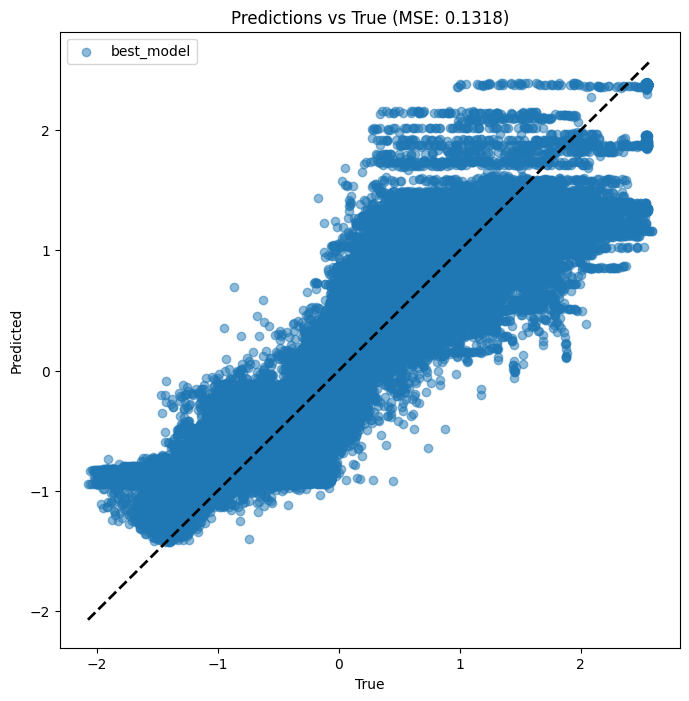

In [13]:
plot_predictions(y_test, models=[best_model])

In [ ]:
raw_data = pd.read_csv('data/Tra.csv')

In [15]:
#make a prediction for a given tilt position and tilt distance to target, and gyro and accel data
best_model.predict(np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.02088113]], dtype=float32)

In [14]:
# Load model weights from weights folder and plot predictions

# Load model weights
from keras.models import load_model, Sequential
import os

weights_dir = 'weights/best_model.weights.h5'



Could not load model from weights/model-config.json: File format not supported: filepath=weights/model-config.json. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(weights/model-config.json, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).
No models were successfully loaded
